In [1]:
# reload modules if they are changed
%load_ext autoreload
%autoreload 2

import os
os.sys.path.insert(0, "/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework") # so VScode know to look here for modules
os.sys.path.insert(0, "/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/project_specific_ipynb_code/bottleneck_project") # so VScode know to look here for modules

# wildcard imports are frowned upon, but oh well, everything is self-contained in this folder anyways
from helper_functions import *
from decoder_helper_functions import *
from viz import *
from data_helper_functions import *
import model_data_base
import Interface as I

print("Cuda is available: "+str(torch.cuda.is_available()))

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/model_data_base/distributed_lock.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
Current version: v0.0.1+1014.gf3e6d75.dirty
Current pid: 106857


/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3/lib/python3.8/site-packages/pandas_msgpack-0.1.4+14.gfcb0471.dirty-py3.8-linux-x86_64.egg/pandas_msgpack/packers.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Timestamp, Period, Series, DataFrame,  # noqa


Loading mechanisms:
setting up local multiprocessing framework ... done


/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/Interface.py:180: UserWarning: The source folder has uncommited changes!
  if get_versions()['dirty']: warnings.warn('The source folder has uncommited changes!')




Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: v0.0.1+1014.gf3e6d75.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, fsspec: 0.8.3, future: 0.18.2, ipykernel: 5.3.4, ipython_genutils: 0.2.0, ipywidgets: 7.6.5, jedi: 0.17.1, jinja2: 2.11.2, joblib: 0.17.0, json: 2.0.9, jupyter_client: 6.1.7, jupyter_core: 4.6.3, kazoo: 2.8.0, kiwisolver: 1.3.0, logging: 0.5.1.2, markupsafe: 1.1.1, matplotlib: 3.3.2, mkl: 2.3.0, neuron: 7.8.2, numexpr: 2.7.1, numpy: 1.19.2, pandas: 1.1.3, pandas_msgpack: 0.1.4+14.gfcb0471.dirty, parameters: 0.2.1, parso: 0.7.0, past: 0.18.2, pexpect: 4.8.0, pickleshare: 0.7.5, platform: 1.0.8, p

In [2]:
# ip adress of running node
ip = "10.102.3.87"

In [3]:
register_databases(ip)  # change this IP every time

registering database with unique_id 2022-08-29_117057_mvi4MLC to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations
registering database with unique_id 2022-08-29_139830_1aB8K0e to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb
registering database with unique_id 2022-09-07_148835_MCLAx5Q to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb
registering database with unique_id 2022-09-16_72225_QtIPT5M to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/reduced_ann_models5_9gopetp1_/mdb


In [4]:
client = I.distributed.Client(ip+':38786')  # this adress changes depending on which node you're using
client

Client Scheduler: tcp://10.102.3.87:38786 Dashboard: http://10.102.3.87:38787/status,Cluster Workers: 48 Cores: 48 Memory: 4.80 TB


In [43]:
# init mdb for which batches should be generated
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/')
mdb._register_this_database()
mdb = mdb['mdbs']
mdb._register_this_database()
mdb = mdb['example_in_distribution_simulation_1ms_INH_adapt_inh_v2.6_shift-3_offset_445_280000_trials']
mdb._register_this_database()
mdb_models = mdb['reduced_ANN_models5']
mdb_models._register_this_database()

batches_dir = mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')]

registering database with unique_id 2022-08-29_117057_mvi4MLC to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations
registering database with unique_id 2022-08-29_139830_1aB8K0e to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb
registering database with unique_id 2022-09-07_148835_MCLAx5Q to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb
registering database with unique_id 2022-09-16_72225_QtIPT5M to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/reduced_ann_models5_9gopetp1_/mdb


In [6]:
batches_dir.join()

'/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/synapse_activation_binned_v2-365_505_1-ei__section_2p8h04xs_'

In [7]:
model_data_base.mdbopen.resolve_mdb_path('mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/recSites.landmarkAscii')

'/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/morphologies_oq0bme6__/WR64_Cell8/recSites.landmarkAscii'

In [8]:
client = I.distributed.Client(ip+':38786')
client

Client Scheduler: tcp://10.102.3.87:38786 Dashboard: http://10.102.3.87:38787/status,Cluster Workers: 48 Cores: 48 Memory: 4.80 TB


# Visualize the weights

In [50]:
model_data_base.mdbopen.resolve_mdb_path('mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/recSites.landmarkAscii')
mdb_dinuka = I.ModelDataBase('/gpfs/soma_fs/scratch/jayalath/mdb_dinuka/300_epoch_retrain')
mdb_models_dinuka = mdb_dinuka['retrain_test_5_times_300_epochs']
mdb_models_arco = mdb['reduced_ANN_models5']
model_dinuka = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__CTY70'
model_arco = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__1HOE2'
model_arco_2layer = "loss_sAP_dAP__bn_2__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__MD4TW"

In [41]:
# define params to visualize the weights
params={
    "n_celltypes": 2,
    "n_spatial_bins": 260,
    "temporal_window_width": 80,
    "weight_scaling": 1
}

show_bins = False
bottleneck_size = 1
celltype = 0 # EXC or INH in the plot
ts = range(params["temporal_window_width"])
t = 70

In [44]:
from viz import WeightPlot
WP = WeightPlot(mdb)

-------------------------------
Starting setup of cell model...
Loading cell morphology...
Reading hoc file mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/WR64_Cell8_L5TT_C2-registered.hocwith_radius_constant_mean.hoc
Creating AIS:
    axon hillock diameter: 3.00
    initial segment diameter: 1.75
    myelin diameter: 1.00
Setting up biophysical model...
    Adding membrane properties to Myelin
    Adding membrane properties to Soma
    Adding membrane properties to AIS
    Adding membrane properties to Dendrite
    Adding membrane properties to ApicalDendrite
    Setting up spatial discretization...
    frequency used for determining discretization: 100.0
    maximum segment length: None
    Total number of compartments in model: 830
    Total length of model cell: 10451.70
    Average compartment length: 12.59
    Maximum compartment (ApicalDendrite) length: 40.81
    Adding membrane range mechanisms to Myelin
        Inserting mechanism pas with spatial distribution uniform

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

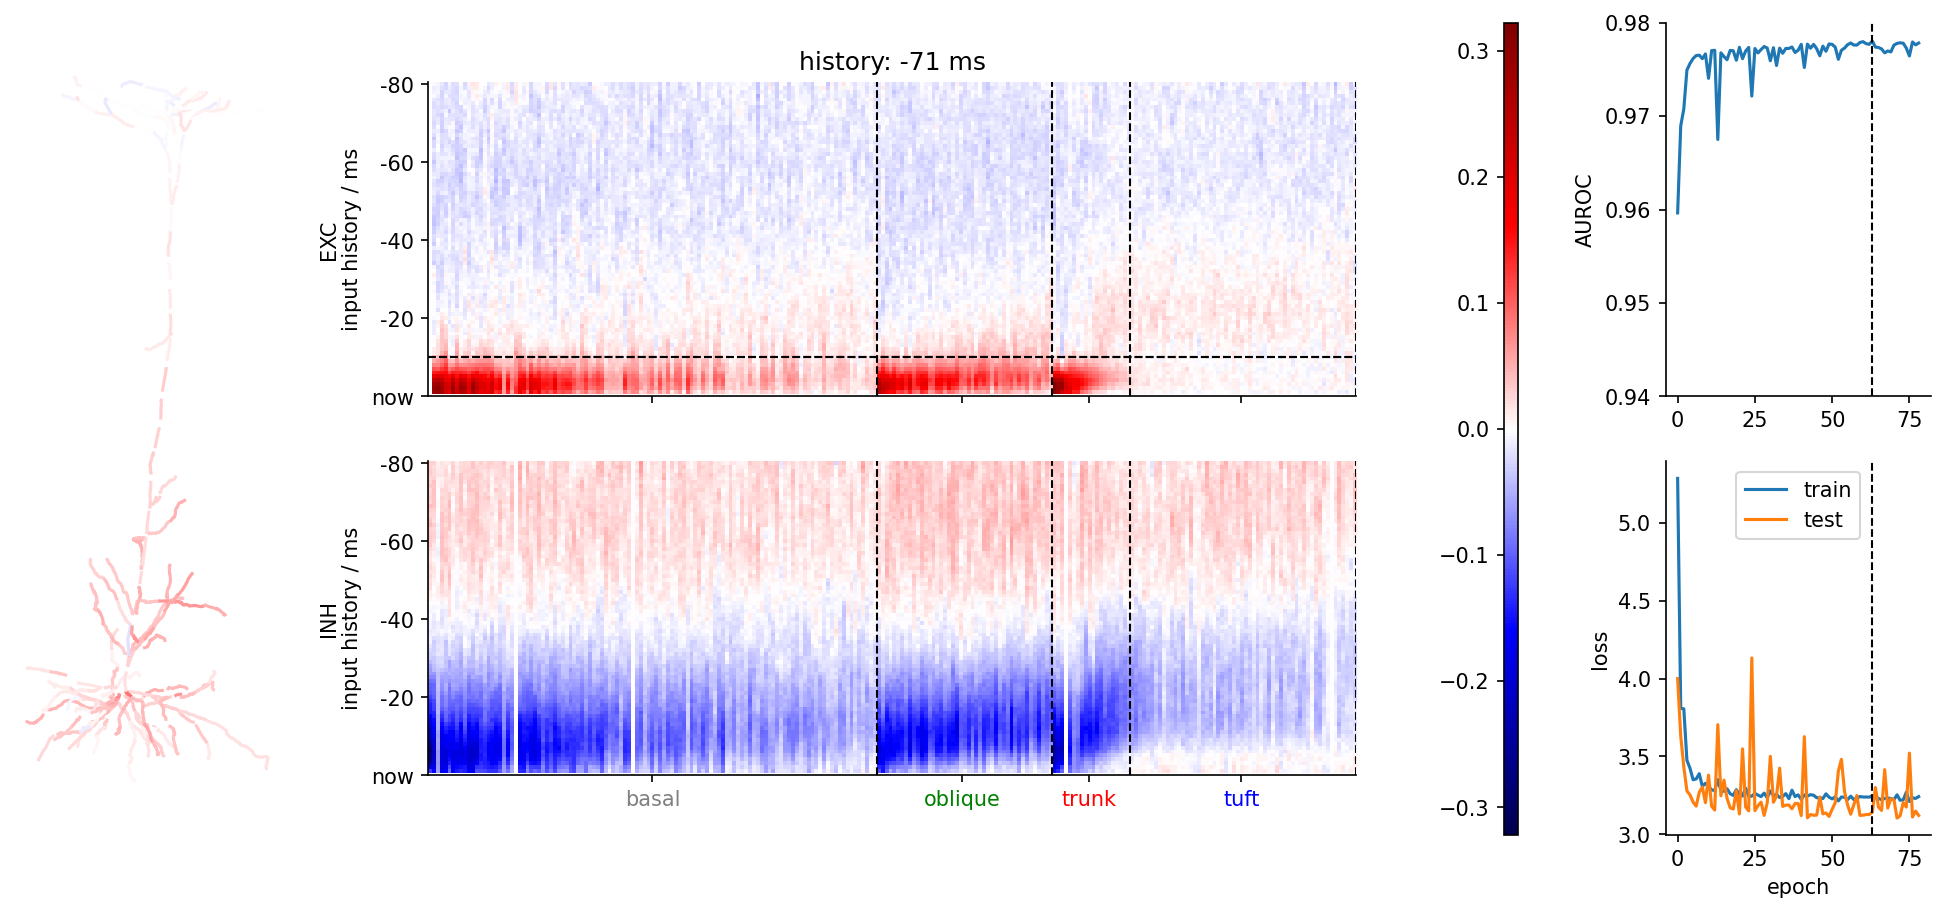

In [49]:
%matplotlib inline
import matplotlib as mpl
COLOR = 'black'  # for VSCode
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_dinuka, model_dinuka)

bottleneck_node = 0

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

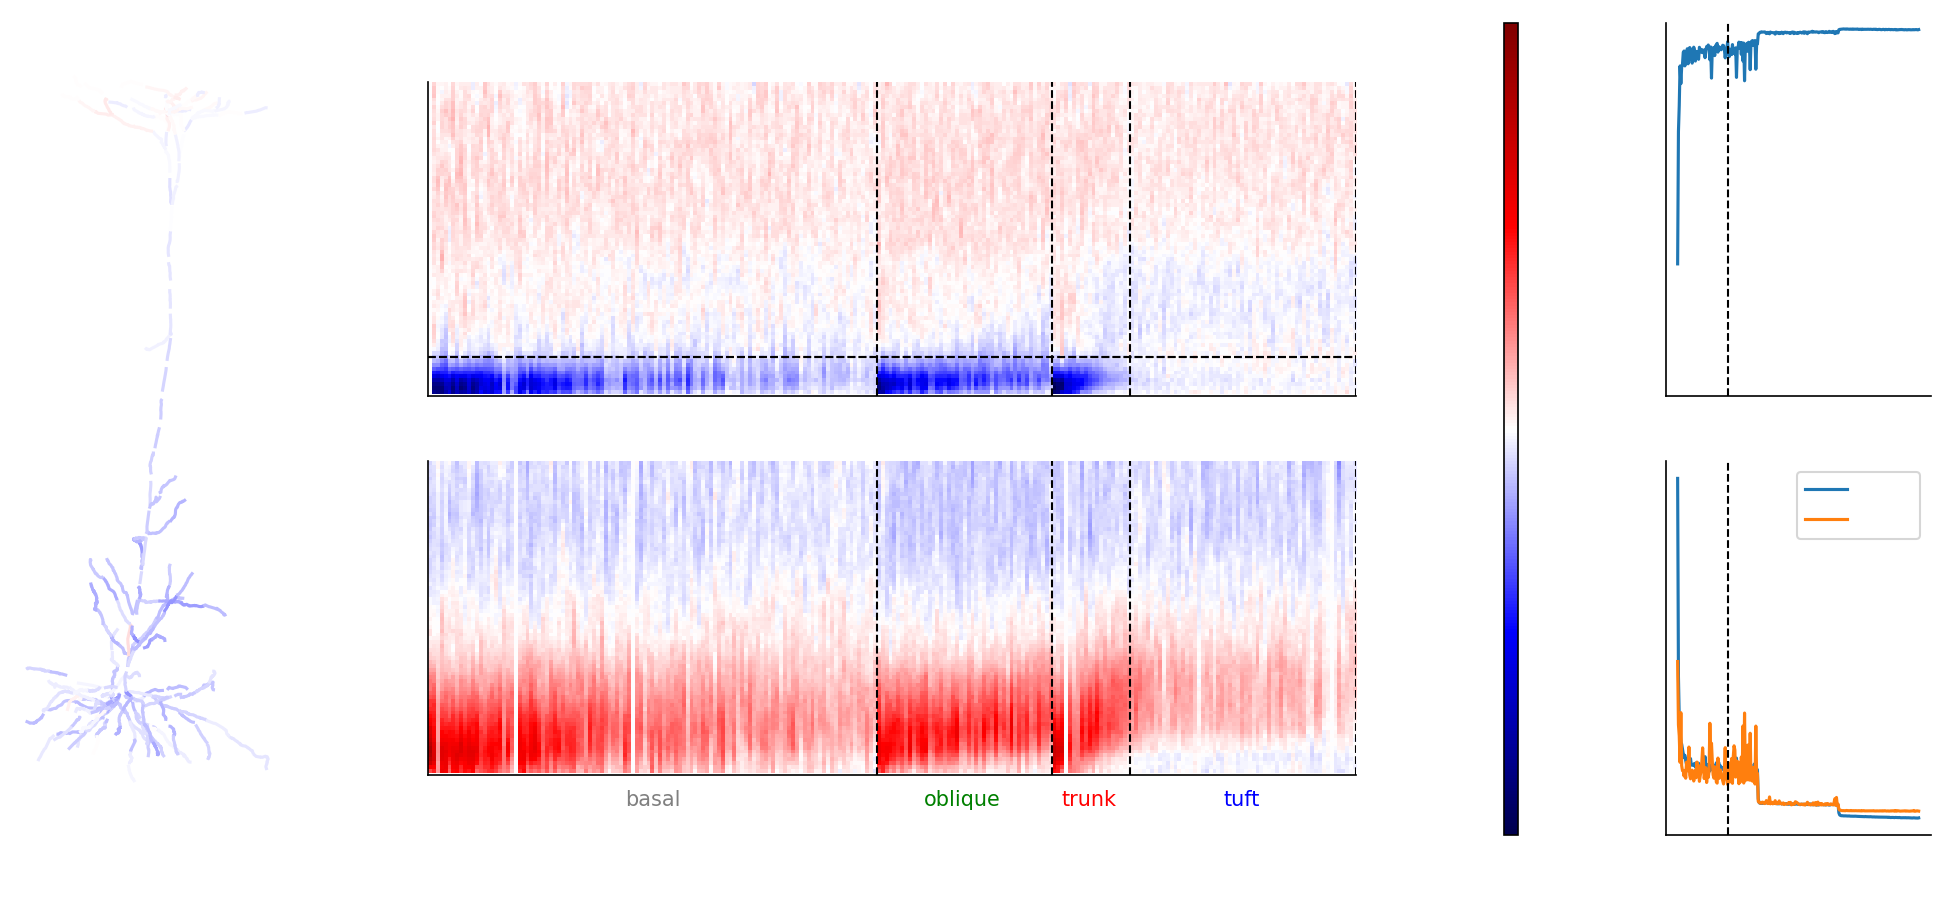

In [19]:
i = 64  # best_epoch
bottleneck_node = 0
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco, best_epoch=i, bottleneck_node=bottleneck_node)


I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

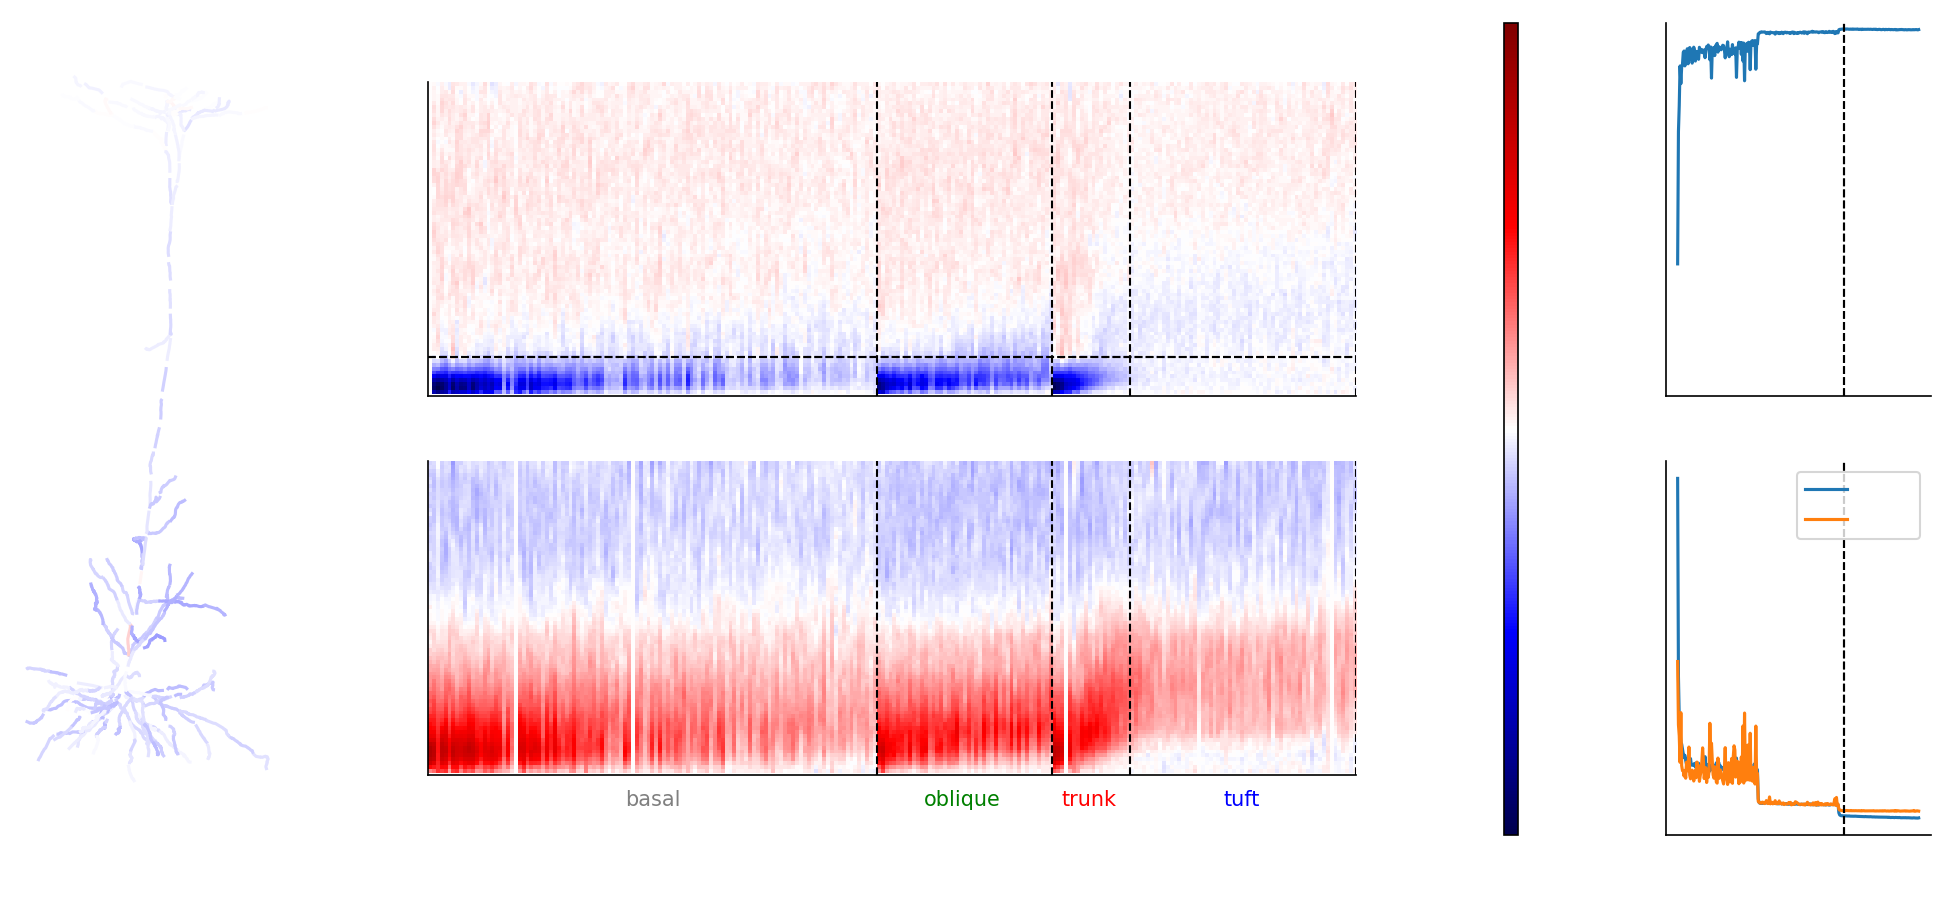

In [20]:
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco)

bottleneck_node = 0

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t, i=i)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

In [52]:
# make a video
mdb_out = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/results/bottleneck')
outdir = mdb_out.create_managed_folder('figures', raise_ = False)  # if not yet created
def plot_weights_at_t(t, mdb_=mdb_models_arco, model_=model_arco, bottleneck_node=0):
    epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_, model_, bottleneck_node)
    WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t,
                          return_axes=False)  # to make interactive plot
    I.plt.title(f"Time: {t}")
    I.plt.savefig(outdir.join("frames/l5pt_weights_t={:03d}.png".format(t)), dpi=100)
    I.plt.close()
    
for t in tqdm(range(80)):
    plot_weights_at_t(t, mdb_models_arco, model_arco_2layer, bottleneck_node=0)

100%|██████████| 80/80 [01:15<00:00,  1.06it/s]


torch.Size([2, 41600])


<Figure size 720x360 with 0 Axes>

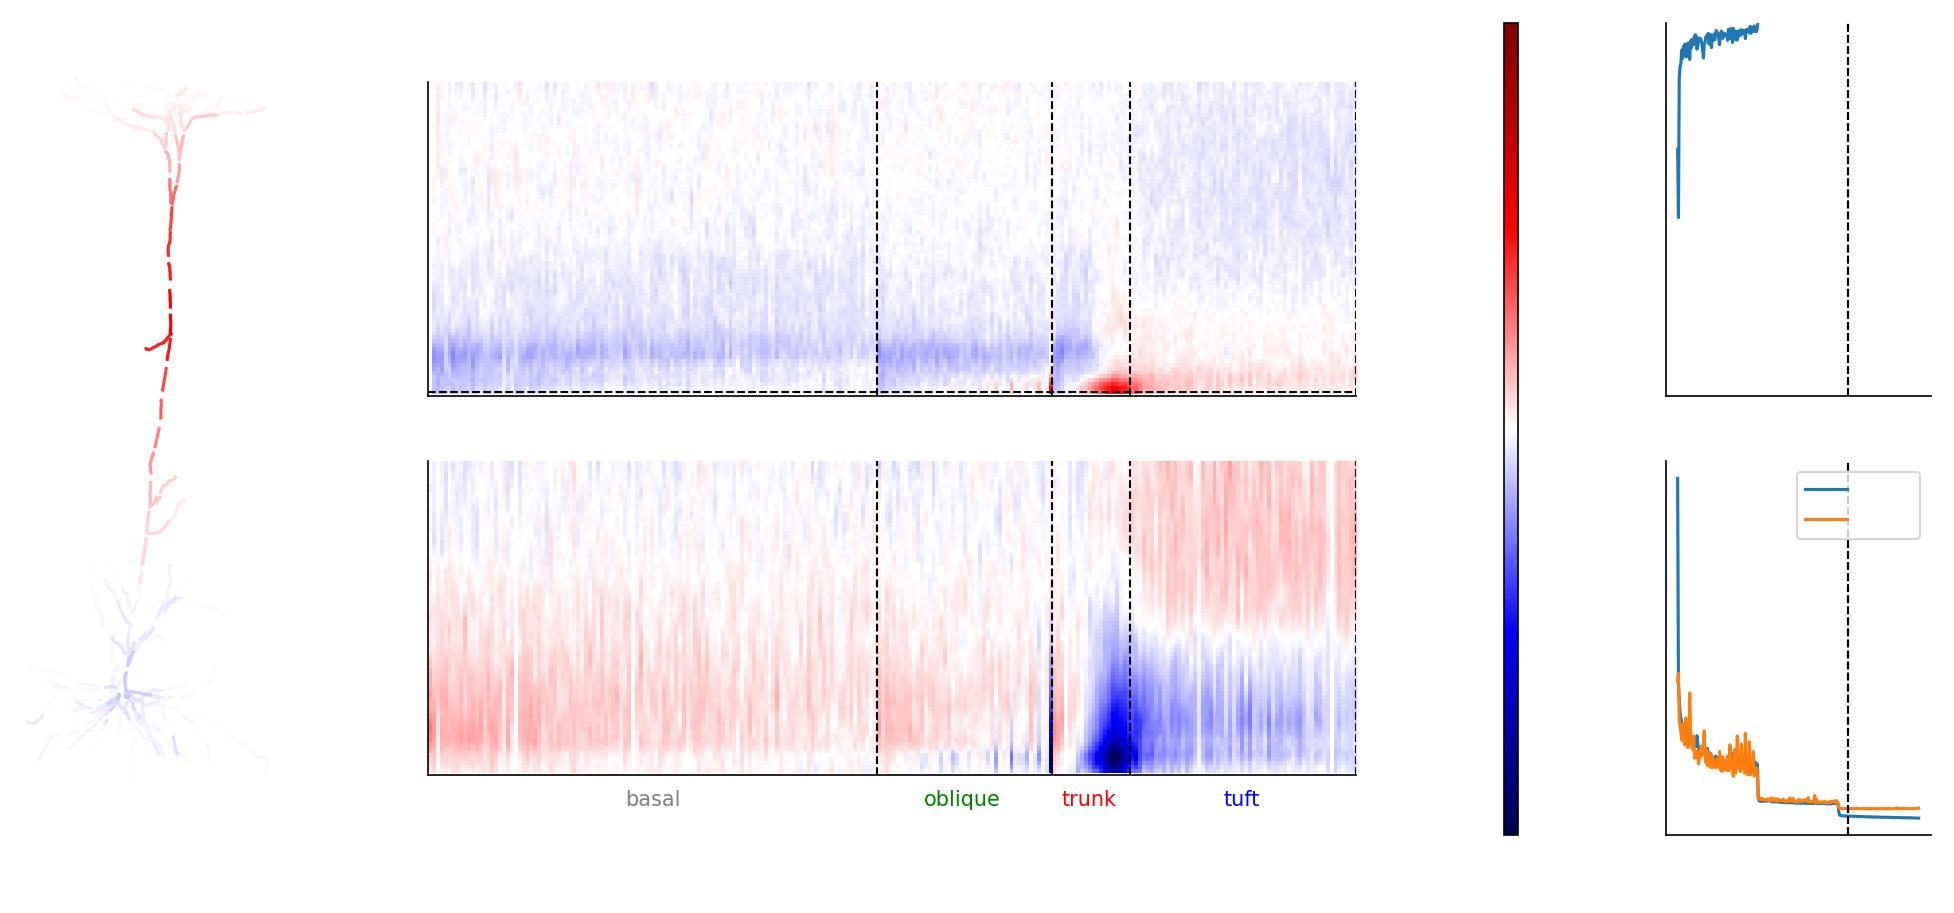

In [53]:
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco_2layer, bottleneck_node=0)

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=79, i=i)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

# Visualizing the decoder network

In [10]:
from decoder_helper_functions import forward_decoder

In [11]:
mdb_models_arco = mdb['reduced_ANN_models5']
model_arco = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__1HOE2'
model = get_model(mdb_models_arco, model_arco)
model.to('cpu')

Model(
  (relu): ReLU()
  (linear1): Linear(in_features=41600, out_features=1, bias=False)
  (bottleneck_layer): Linear(in_features=3, out_features=40, bias=True)
  (layer_asd_0): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_1): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_2): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_3): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_4): Linear(in_features=40, out_features=40, bias=True)
  (output_layer): Linear(in_features=40, out_features=1, bias=True)
)

In [11]:
# Loading data
batch_range = 560  # all batches: 560
# batch_range = 60  # some batches
SA, ISI_SOMA, AP_SOMA, VT_SOMA, ISI_DEND, AP_DEND, VT_DEND = load_data_uncached(batches_dir, batch_range=batch_range)
decoder_params = {
    "AP_SOMA": AP_SOMA,
    "AP_DEND": AP_DEND,
    "ISI_SOMA": ISI_SOMA,
    "ISI_DEND": ISI_DEND,
    "VT_SOMA": VT_SOMA,
    "VT_DEND": VT_DEND,
    "SA": SA,
    "temporal_window_width": 80
}

Loading batches: 100%|██████████| 560/560 [06:02<00:00,  1.54it/s]


In [12]:
from decoder_helper_functions import get_decoder_info
# parse data: feed it through forward() function
soma_isi, dend_isi, bottleneck_out, model_out = get_decoder_info(**decoder_params, model=model)

Sliding 80 ms wide time window from 0 to 60: 100%|██████████| 60/60 [02:46<00:00,  2.78s/it]


In [16]:
mdb_out = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/results/bottleneck')
# outdir = mdb.create_managed_folder('figures', raise_ = False)  # if not yet created

PermissionError: [Errno 13] Permission denied: '/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/figures_41600nfy_'

In [14]:
# Create dataframe to scrobble through
df = I.pd.DataFrame.from_dict({"soma_isi": soma_isi[:,0], "bottleneck_node": -1*bottleneck_out[:,0], 
"dend_isi": dend_isi[:,0], "model_output": model_out[:,0]})
# dend_isi needs to be substracted by 100ms due to some error in previous code that generated this data
mdb_out["4d-data"] = df

start deleting /gpfs/soma_fs/scratch/meulemeester/results/bottleneck/4d-data_h595cbkb_
done deleting /gpfs/soma_fs/scratch/meulemeester/results/bottleneck/4d-data_h595cbkb_


/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/model_data_base/model_data_base.py:526: UserWarning: The database source folder has uncommitted changes!
  warnings.warn('The database source folder has uncommitted changes!')


## Plotting the training data

In [30]:
import Interface as I
# loading the data. This is re-defined in this cell in case the kernel dies inbetween, so you don't have to re-process the data
mdb_out = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/results/bottleneck')
df = mdb["4d-data"]
outdir = mdb_out.create_managed_folder('figures', raise_ = False)  # if not yet created
ax_lim=(0,300)  # limits for dend_isi and soma_isi in ms

mn, mx = -10, 15  # min and max weighted somatic drive: -10 and 15
stepsize=.2  # .2 is smooth

# @I.dask.delayed  # there is a lot of io going on, so running this with dask may crash dask
def write_frame(weighted_input, stepsize=0.2):
    """
    Given a value for synaptic input (i.e. the first bottleneck node), writes out a frame with a 
    scatterplot of the training data that has an aggregated synaptic input between 
    :param weighted_input: and :param weighted_input: + :param stepsize:

    These can then be stitched together using ffmpeg by going to the directory where these frames are stored and running
    ```
    ml ffmpeg
    ffmpeg -framerate 12 -pattern_type glob -i "frames/training_data_input=*.png" -q:v 2 <output_name>.mp4
    ```
    """
    # setup figure
    I.plt.xlabel('soma_isi (ms)')
    I.plt.ylabel('dend_isi (ms)')
    I.plt.ylim(ax_lim)
    I.plt.xlim(ax_lim)
    I.plt.minorticks_off()  # speedup?

    # plot data
    data = df[(df["bottleneck_node"] <=weighted_input+stepsize) & (df["bottleneck_node"] > weighted_input)]  # this is surprisingly quick
    I.plt.scatter(data["soma_isi"].values, data["dend_isi"].values, s=3, c=data["model_output"], cmap="viridis", vmin=0, vmax=1)
    I.plt.title(f"weighted_input={round(weighted_input, 2)}")
    I.plt.colorbar()

    # plot y=x for visual guide to see equal timing dend and soma
    I.plt.plot(ax_lim, ax_lim, color="black", linewidth=1)
    I.plt.plot(ax_lim, ax_lim, color="white", linewidth=.5)

    # save plot to disk -> largest bottleneck on speed so far
    suffix = int(str(round(weighted_input+10, 2)).replace(".", ""))  # id for filename
    # I.plt.savefig(outdir.join("frames/training_data_input={:03d}.png".format(suffix)), dpi=200)
    I.plt.show()
    I.plt.close()

client.compute(
    [
    write_frame(weighted_input, stepsize) for weighted_input in I.np.arange(mn, mx, step=stepsize)
    ])

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

array([[<AxesSubplot:title={'center':'dend_isi'}>,
        <AxesSubplot:title={'center':'soma_isi'}>]], dtype=object)

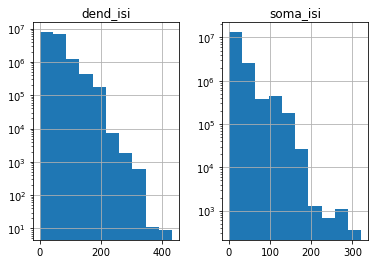

In [22]:
%matplotlib inline
df[["dend_isi", "soma_isi"]].hist(log=True)


## Training data vs model predictions

Plot all possible inputs to the decoder, but also keep track of which of these inputs are novel compared to the training data.

For this, we're using local outlier factor (LOF), which checks the distance of the points to it's nearest neighbors. When we now set the nearest neighbors to only include the training data, we have a metric to score how "novel" some generated input point is.

In [82]:
# from sklearn.neighbors import LocalOutlierFactor
# # normalisation constants
# maxx, maxy, maxz = max(soma_isi[:, 0]), max(bottleneck_out[:,0]), max(dend_isi[:, 0])
# # normalised data
# data = np.array([(x, y, z) for x, y, z in zip(soma_isi[:,0]/maxx, bottleneck_out[:,0]/maxy, 
# dend_isi[:,0]/maxz)])  # 3D training data
# print(data.shape)

# # Fit local outlier factor (LOF) to training data
# lof = LocalOutlierFactor(novelty=True)
# lof.fit(data)  # fit Local Outlier Factor to normalised space

Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired


(16800000, 3)


In [36]:
import Interface as I
mdb_out = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/results/bottleneck')
df = mdb_out["4d-data"]
ax_lim = (0, 300)
outdir = mdb_out.create_managed_folder('figures', raise_ = False)  # if not yet created

@I.dask.delayed  # there is a lot of io going on, so running this with dask may crash dask
def write_overlay_frame(weighted_input, stepsize=.2, model=model):
    """
    Given a value for synaptic input (i.e. the first bottleneck node), writes out a frame with:
    - All possible bottleneck values given the synaptic input (i.e. full range of dend_isi and soma_isi)
    - A scatterplot of the training data that has an aggregated synaptic input between
     :param weighted_input: and :param weighted_input: + :param stepsize:

    These can then be stitched together using ffmpeg by going to the directory where these frames are stored and running
    ```
    ml ffmpeg
    ffmpeg -framerate 12 -pattern_type glob -i "frames/overlay_SI=*.png" -q:v 2 <output_name>.mp4
    ```
    """
    # setup figure
    I.plt.xlabel('soma_isi (ms)')
    I.plt.ylabel('dend_isi (ms)')
    I.plt.ylim(ax_lim)
    I.plt.xlim(ax_lim)
    I.plt.minorticks_off()  # speedup?
    # data = df[(df["bottleneck_node"] <=weighted_input+stepsize) & (df["bottleneck_node"] > weighted_input)]

    # Construct full grid of possible decoder inputs with a specific dend_ISI
    bottleneck_values = I.np.array([-1*weighted_input])  # flipped model
    soma_isi_inputs = I.np.arange(-0, 300, 1)
    ISI_dend_values = I.np.arange(-0, 300, 1)
    decoder_input = cartesian_product(bottleneck_values, soma_isi_inputs, ISI_dend_values)
    decoder_input_torch = torch.Tensor(decoder_input)
    # :,0 is bottleneck_node
    # :,1 is soma_isi
    # :,2 is dend_isi

    # Calculate model outputs of all inputs
    model_out_torch = forward_decoder(model, decoder_input_torch)
    model_out_torch = torch.sigmoid(model_out_torch)
    model_out_ = model_out_torch.cpu().detach().numpy()
    # plot all model predictions
    I.plt.scatter(decoder_input[:,1], decoder_input[:,2], s=2, c=model_out_, alpha=.1, vmin=0, vmax=1, cmap='viridis')

    # plot data
    # I.plt.scatter(data["soma_isi"].values, data["dend_isi"].values, s=3, c=data["model_output"], cmap="viridis", vmin=0, vmax=1)
    # plot y=x for visual guide to see equal timing dend and soma
    I.plt.plot(ax_lim, ax_lim, color="black", linewidth=1)
    I.plt.plot(ax_lim, ax_lim, color="white", linewidth=.5)
    I.plt.title(f"weighted_input={round(weighted_input, 2)}")
    I.plt.colorbar()

    # save plot
    suffix = int(str(round(weighted_input+10, 2)).replace(".", ""))  # id for filename
    
    I.plt.savefig(outdir.join("frames/model_only={:03d}.png".format(suffix)), dpi=200)
    # I.plt.show()
    I.plt.close()


mn, mx = -10, 15  # min and max synaptic input values
stepsize=.2
# upload modules needed to dask workers
client.upload_file("/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/project_specific_ipynb_code/bottleneck_project/decoder_helper_functions.py")
client.compute(
[
    write_overlay_frame(weighted_input, stepsize) for weighted_input in I.np.arange(mn, mx, step=stepsize)
]
)


[<Future: pending, key: write_overlay_frame-c513cf14-5b43-4cca-94a8-90b2547d6950>,
 <Future: pending, key: write_overlay_frame-520902bf-15b3-4a0a-b1d3-e96c7e16dd0f>,
 <Future: pending, key: write_overlay_frame-b08fa6c1-523a-4d04-93dd-22f5ec277237>,
 <Future: pending, key: write_overlay_frame-d6526f7f-8834-43b2-871f-4a416d05fe01>,
 <Future: pending, key: write_overlay_frame-44021c16-f8e0-49dc-8a98-849009b354bc>,
 <Future: pending, key: write_overlay_frame-1ccaeff0-5c5f-4682-b708-153dc642988f>,
 <Future: pending, key: write_overlay_frame-84af8769-6d14-4fff-b02c-becdcb278c23>,
 <Future: pending, key: write_overlay_frame-f4427c00-11f4-410b-8112-bd9e3c7b67eb>,
 <Future: pending, key: write_overlay_frame-387bbc25-db0d-4f49-9f76-e6cb9bdbc378>,
 <Future: pending, key: write_overlay_frame-25b1c24d-17fe-4a78-98e1-39b440733597>,
 <Future: pending, key: write_overlay_frame-f644c2c1-36b7-4b60-a502-7fe0a0035e4c>,
 <Future: pending, key: write_overlay_frame-ce0b3d04-9d7f-4659-8f98-90930be86d25>,
 <Fu